In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import re

In [9]:
data = pd.read_csv('global_jobs_dataset_100k.csv')

In [10]:
data['combined'] = data['title'] + ' ' + data['description'] + ' ' + data['skills']
data['date_posted'] = pd.to_datetime(data['date_posted'])

In [11]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2), max_features=20000)
tfidf_matrix = vectorizer.fit_transform(data['combined'])

In [12]:
def tfidf_job_recommender(user_input, top_n=50):
    user_input = user_input.lower()
    user_vec = vectorizer.transform([user_input])
    similarities = cosine_similarity(user_vec, tfidf_matrix).flatten()
    top_indices = similarities.argsort()[-top_n:][::-1]
    results = data.iloc[top_indices].copy()
    results['similarity_score'] = similarities[top_indices]
    return results[['title', 'description', 'skills', 'location', 'date_posted', 'similarity_score']].sort_values(
        by=['similarity_score', 'date_posted'], ascending=[False, False])

In [13]:
user_keywords = "nurse"
matched_jobs = tfidf_job_recommender(user_keywords)


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


In [15]:
def plot_keyword_hit_distribution(matched_jobs, keywords):
    keywords = [k.strip().lower() for k in keywords.split(",")]

    matched_jobs['matched_keywords'] = matched_jobs.apply(
        lambda row: [kw for kw in keywords if kw in (row['title'] + row['skills']).lower()], axis=1
    )
    matched_counts = pd.Series([kw for kws in matched_jobs['matched_keywords'] for kw in kws]).value_counts()

    plt.figure(figsize=(8,5))
    sns.barplot(x=matched_counts.index, y=matched_counts.values, palette="viridis")
    plt.title("Keyword Match Frequency in Top Jobs")
    plt.ylabel("Match Count")
    plt.xlabel("Keyword")
    plt.show()


In [16]:
def plot_top_titles(matched_jobs, top_n=10):
    top_titles = matched_jobs['title'].value_counts().head(top_n)
    plt.figure(figsize=(8,5))
    sns.barplot(y=top_titles.index, x=top_titles.values, palette="cubehelix")
    plt.title("Top Job Titles in Recommendations")
    plt.xlabel("Count")
    plt.ylabel("Job Title")
    plt.show()


In [17]:
def plot_top_locations(matched_jobs, top_n=10):
    top_locations = matched_jobs['location'].value_counts().head(top_n)
    plt.figure(figsize=(8,5))
    sns.barplot(y=top_locations.index, x=top_locations.values, palette="magma")
    plt.title("Top Locations in Recommendations")
    plt.xlabel("Count")
    plt.ylabel("Location")
    plt.show()


In [18]:
def plot_similarity_distribution(matched_jobs):
    plt.figure(figsize=(8,5))
    sns.histplot(matched_jobs['similarity_score'], bins=20, kde=True, color="skyblue")
    plt.title("Similarity Score Distribution")
    plt.xlabel("Similarity Score")
    plt.ylabel("Frequency")
    plt.show()


In [19]:
matched_jobs = tfidf_job_recommender(user_keywords)


C:\Users\hp\AppData\Local\Temp\ipykernel_19560\1609861737.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=matched_counts.index, y=matched_counts.values, palette="viridis")


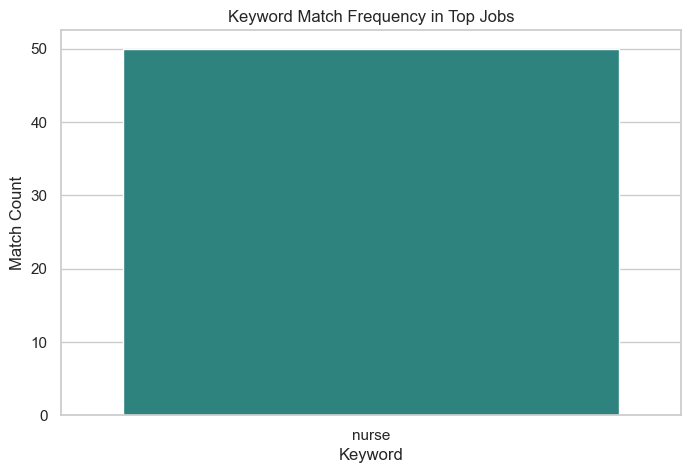

C:\Users\hp\AppData\Local\Temp\ipykernel_19560\4221738722.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_titles.index, x=top_titles.values, palette="cubehelix")


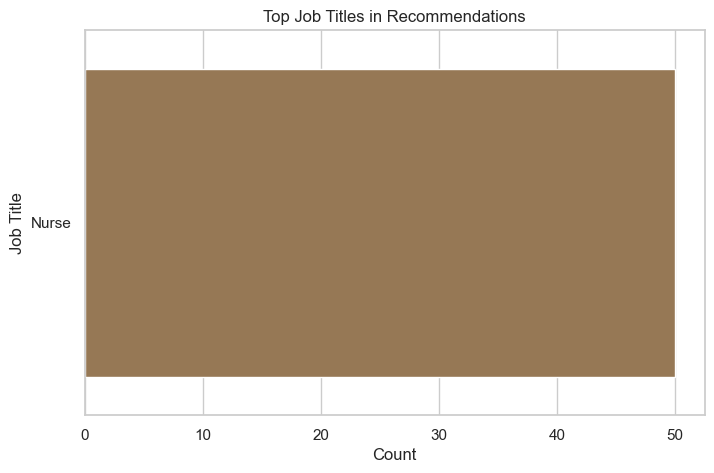

C:\Users\hp\AppData\Local\Temp\ipykernel_19560\633859881.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_locations.index, x=top_locations.values, palette="magma")


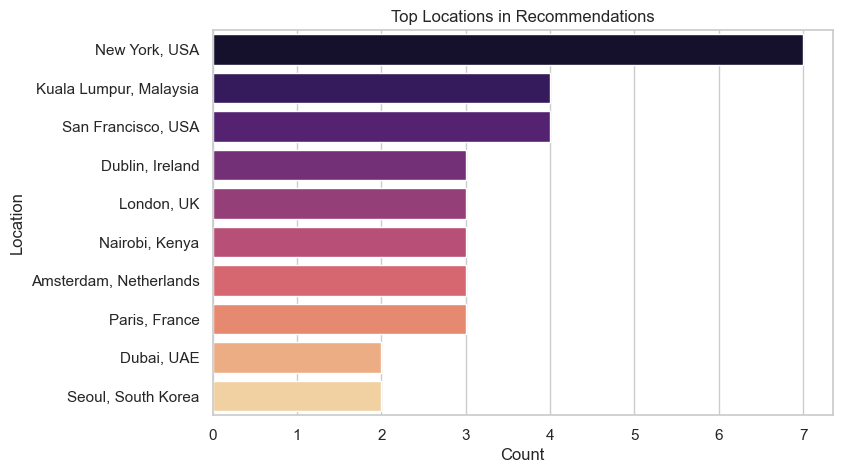

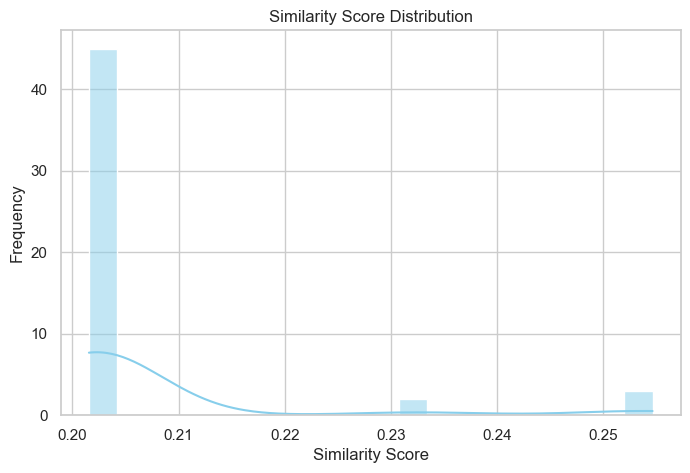

In [20]:
plot_keyword_hit_distribution(matched_jobs, user_keywords)
plot_top_titles(matched_jobs)
plot_top_locations(matched_jobs)
plot_similarity_distribution(matched_jobs)


In [21]:
"nurse" in vectorizer.vocabulary_


True

In [22]:
def keyword_hit_rate(matched_jobs, keywords):
    keywords = [kw.strip().lower() for kw in keywords.split(",")]
    matched_jobs['text_lower'] = (matched_jobs['title'] + " " + matched_jobs['description'] + " " + matched_jobs['skills']).str.lower()
    hits = matched_jobs['text_lower'].apply(lambda text: any(kw in text for kw in keywords))
    hit_rate = hits.sum() / len(matched_jobs) if len(matched_jobs) > 0 else 0
    return hit_rate

hit_rate = keyword_hit_rate(matched_jobs, user_keywords)
print(f"Keyword hit rate: {hit_rate:.2%}")


Keyword hit rate: 100.00%


In [23]:
user_input = "nurse"
user_vec = vectorizer.transform([user_input])


In [24]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']